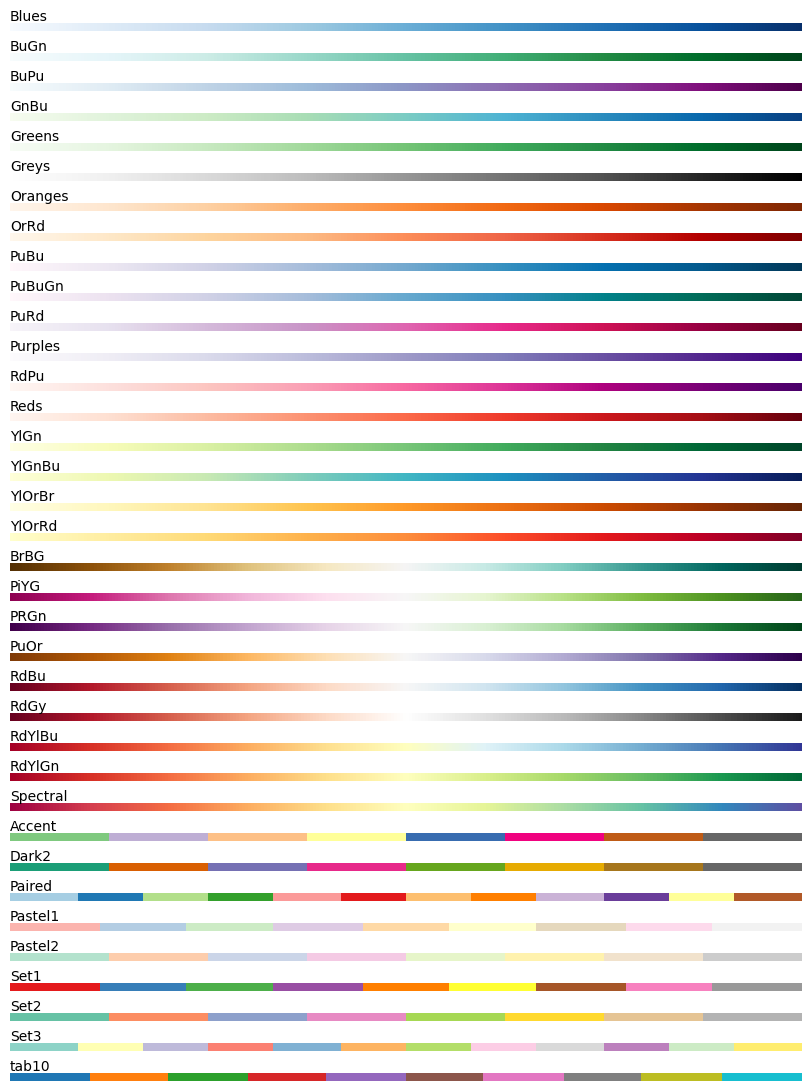

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Lists of Brewer colormaps by category
sequential = [
    'Blues', 'BuGn', 'BuPu', 'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
    'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu', 'Reds', 'YlGn', 'YlGnBu',
    'YlOrBr', 'YlOrRd'
]

diverging = [
    'BrBG', 'PiYG', 'PRGn', 'PuOr', 'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral'
]

qualitative = [
    'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10'
]

all_maps = sequential + diverging + qualitative

# Plot the colormaps
def plot_colormaps(maps):
    n = len(maps)
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    
    fig, axs = plt.subplots(n, 1, figsize=(8, 0.3 * n), constrained_layout=True)

    # If only one colormap, axs is not a list
    if n == 1:
        axs = [axs]

    for ax, name in zip(axs, maps):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.set_axis_off()
        ax.set_title(name, loc='left', fontsize=10, pad=2)

    plt.show()

plot_colormaps(all_maps)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colorbar as colorbar
import matplotlib.colors as mcolors

# Create a figure and a single axis
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# Create a colormap and a normalization from 0 to 1
cmap = plt.get_cmap('PiYG')
norm = mcolors.Normalize(vmin=0, vmax=1)

# Create a colorbar and plot it
cb = colorbar.ColorbarBase(ax, cmap=cmap,
                           norm=norm,
                           orientation='horizontal')

cb.set_label('Intensity')

# Save the figure as a PNG
plt.savefig('colorbar_PiYG.png', dpi=300, bbox_inches='tight')
plt.close()

print("Colorbar saved as 'colorbar_PiYG.png'")


Colorbar saved as 'colorbar_PiYG.png'


In [ ]:
# write a python script that generate a 256x256 animated gif of the PiYG colormap fading from just the central colormap color to fully saturated in 0.5 second, then holding the colormap for 2 seconds, then fading back to the central colormap color

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image

# Parameters
width, height = 256, 256
fps = 30
fade_duration = 0.5  # seconds
hold_duration = 2.0  # seconds

# Frame calculations
fade_frames = int(fps * fade_duration)
hold_frames = int(fps * hold_duration)
total_frames = fade_frames * 2 + hold_frames

# Load the PiYG colormap
cmap = cm.get_cmap('PiYG', 256)
colors = cmap(np.linspace(0, 1, 256))  # shape: (256, 4)

# Get the central (midpoint) color
mid_color = colors[128]  # RGBA

# Function to blend from mid_color to full colormap
def interpolate_colormap(alpha):
    return (1 - alpha) * mid_color + alpha * colors

# Generate frames
frames = []
for i in range(total_frames):
    if i < fade_frames:
        alpha = i / fade_frames  # fade in
    elif i < fade_frames + hold_frames:
        alpha = 1.0  # hold
    else:
        alpha = 1 - ((i - fade_frames - hold_frames) / fade_frames)  # fade out

    interpolated = interpolate_colormap(alpha)
    img_data = np.tile(interpolated[np.newaxis, :, :3], (height, 1, 1))  # Remove alpha
    img_data_uint8 = (img_data * 255).astype(np.uint8)
    frame = Image.fromarray(img_data_uint8)
    frames.append(frame)

# Save as animated GIF
frames[0].save(
    "PiYG_fade.gif",
    save_all=True,
    append_images=frames[1:],
    duration=int(1000 / fps),
    loop=0
)

print("Saved as PiYG_fade.gif")


In [6]:
# Animate the gradient waveform itself...

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Parameters
rise_time = 0.5      # seconds
plateau_time = 2.0   # seconds
fall_time = 0.5      # seconds
total_time = rise_time + plateau_time + fall_time

fps = 30
total_frames = int(total_time * fps)

# Create time vector
t = np.linspace(0, total_time, total_frames)

# Create trapezoidal waveform
waveform = np.piecewise(
    t,
    [t < rise_time,
     (t >= rise_time) & (t < rise_time + plateau_time),
     t >= rise_time + plateau_time],
    [lambda t: t / rise_time,
     1,
     lambda t: 1 - (t - rise_time - plateau_time) / fall_time]
)

# Image parameters
width = 512
height = 256
margin = 20

# Normalize waveform to fit in image dimensions
x_coords = np.linspace(margin, width - margin, total_frames).astype(int)
y_coords = (height - margin) - (waveform * (height - 2 * margin)).astype(int)

# Dot size
dot_radius = 5

# Generate frames
frames = []
for i in range(total_frames):
    img = np.zeros((height, width), dtype=np.uint8)

    # Draw full waveform as a solid line
    for j in range(1, total_frames):
        img[y_coords, x_coords] = 255

    # Draw thick moving dot
    for dx in range(-dot_radius, dot_radius + 1):
        for dy in range(-dot_radius, dot_radius + 1):
            x = x_coords[i] + dx
            y = y_coords[i] + dy
            if 0 <= x < width and 0 <= y < height:
                img[y, x] = 255

    img_rgb = np.stack([img] * 3, axis=-1)  # Convert grayscale to RGB
    frames.append(Image.fromarray(img_rgb))

# Save as animated GIF
frames[0].save(
    "trapezoidal_waveform_thick_dot.gif",
    save_all=True,
    append_images=frames[1:],
    duration=int(1000 / fps),
    loop=0
)

print("GIF saved as 'trapezoidal_waveform_thick_dot.gif'")


GIF saved as 'trapezoidal_waveform_thick_dot.gif'
